In [1]:
import math
import matplotlib.pyplot as plt
import torch
from dir.models.ddpm_model import *
from dir import utils

from diffusers import DDPMPipeline, DDPMScheduler, DDIMPipeline, DDIMScheduler
from diffusers.optimization import get_scheduler
from omegaconf import OmegaConf

%load_ext autoreload
%autoreload 2

In [2]:
te = get_timestep_embedding(torch.arange(96), 48).numpy().T
te.shape

(48, 96)

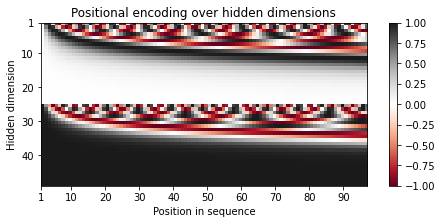

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
pos = ax.imshow(te, cmap="RdGy", extent=(1,te.shape[1]+1,te.shape[0]+1,1))
fig.colorbar(pos, ax=ax)
ax.set_xlabel("Position in sequence")
ax.set_ylabel("Hidden dimension")
ax.set_title("Positional encoding over hidden dimensions")
ax.set_xticks([1]+[i*10 for i in range(1,1+te.shape[1]//10)])
ax.set_yticks([1]+[i*10 for i in range(1,1+te.shape[0]//10)])
plt.show()

In [4]:
cfg = OmegaConf.load('./configs/cifar10.yaml')
model = Model(**cfg.model)
ckpt = torch.load('./pretrained/ddpm/cifar10_ema_model-790000.ckpt')
model.load_state_dict(ckpt)

<All keys matched successfully>

In [5]:
from torchinfo import summary

b, c, s = 8, 3, 32
x = torch.randn(b, c, s, s)
t = torch.randint(0, 1000, (b,)).long()

model(x, t)['sample'].shape

torch.Size([8, 3, 32, 32])

In [6]:
model.sample_size = 32

In [7]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

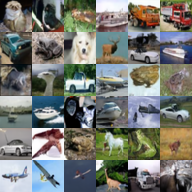

In [8]:
images = pipeline(batch_size=36, output_type="numpy")["sample"]
utils.to_pil_image(utils.make_grid(images, 6))

In [9]:
from omegaconf import OmegaConf
cfg = OmegaConf.load('./configs/models/ddpm/lsun.yaml')
model = Model(**cfg)
ckpt = torch.load('./pretrained/ddpm/lsun_bedroom_model-2388000.ckpt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

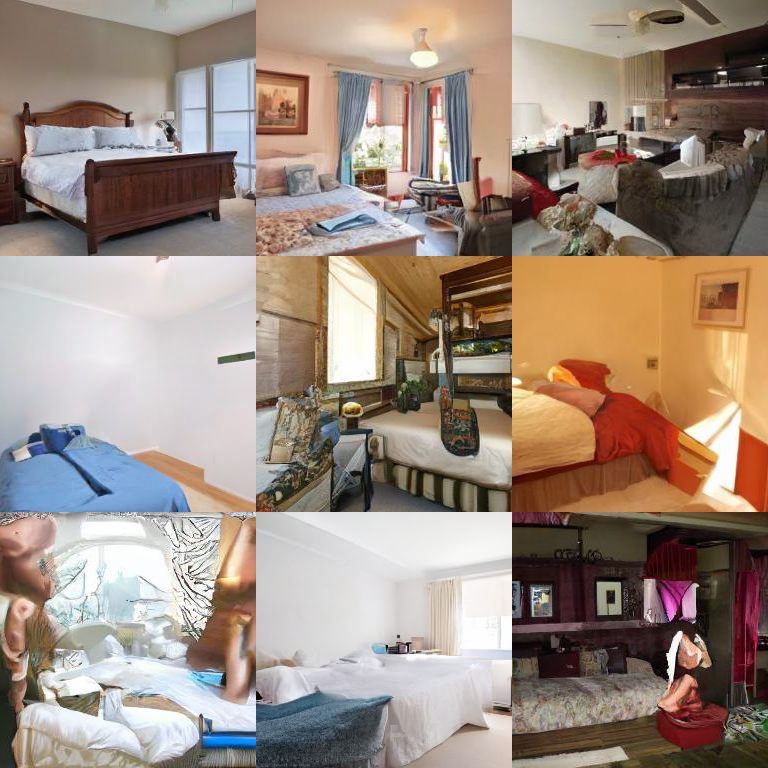

In [10]:
img = pipeline(batch_size=9, output_type="numpy")["sample"]
utils.to_pil_image(utils.make_grid(img, 3))

In [13]:
from omegaconf import OmegaConf
cfg = OmegaConf.load('./configs/models/ddpm/lsun.yaml')
model = Model(**cfg)
ckpt = torch.load('./pretrained/ddpm/lsun_church_model-4432000.ckpt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

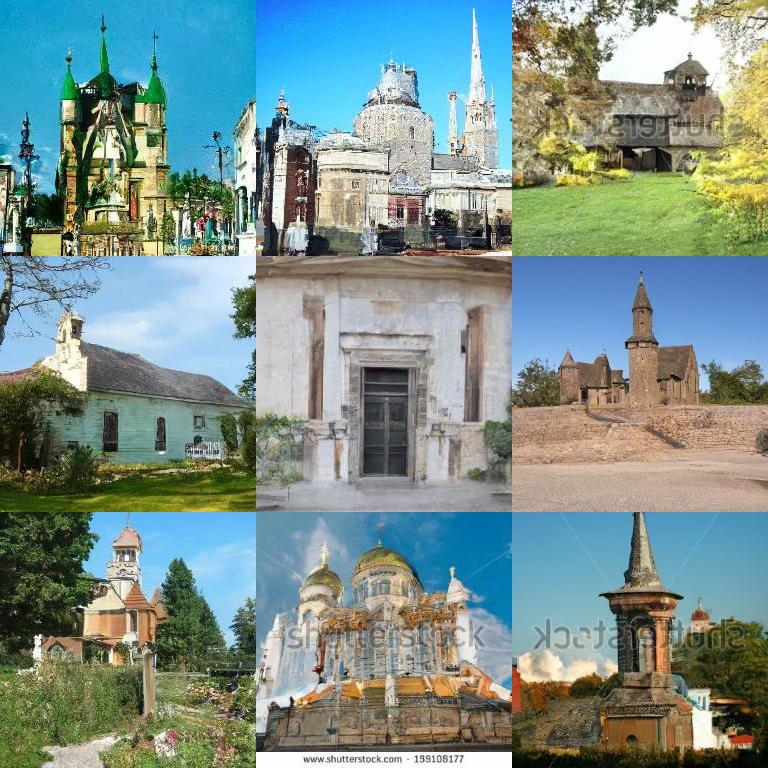

: 

In [14]:
img = pipeline(batch_size=9, output_type="numpy")["sample"]
utils.to_pil_image(utils.make_grid(img, 3))

In [ ]:
from omegaconf import OmegaConf
cfg = OmegaConf.load('./configs/models/ddpm/lsun.yaml')
model = Model(**cfg)
ckpt = torch.load('./pretrained/ddpm/lsun_cat_model-1761000.ckpt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

In [ ]:
img = pipeline(batch_size=9, output_type="numpy")["sample"]
utils.to_pil_image(utils.make_grid(img, 3))

In [ ]:
from omegaconf import OmegaConf
cfg = OmegaConf.load('./configs/models/ddpm/lsun.yaml')
model = Model(**cfg)
ckpt = torch.load('./pretrained/ddpm/lsun_bedroom_model-2388000.ckpt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDIMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDIMPipeline(
    unet=model,
    scheduler=noise_scheduler
)

In [ ]:
img = pipeline(
    batch_size=16, 
    eta=0.0,
    num_inference_steps=50,
    output_type="numpy",
)["sample"]
utils.to_pil_image(utils.make_grid(img, 4))

In [ ]:
from omegaconf import OmegaConf
cfg = OmegaConf.load('./configs/models/ddpm/lsun.yaml')
model = Model(**cfg)
ckpt = torch.load('./pretrained/ddpm/lsun_cat_model-1761000.ckpt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDIMScheduler(num_train_timesteps=1000, tensor_format="pt")
pipeline = DDIMPipeline(
    unet=model,
    scheduler=noise_scheduler
)

In [ ]:
img = pipeline(
    batch_size=16, 
    eta=0.0,
    num_inference_steps=50,
    output_type="numpy",
)["sample"]
utils.to_pil_image(utils.make_grid(img, 4))